In [1]:
# install streamlit
!pip install streamlit

# import necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler           # MinMaxScaler helps to normalise your data between 0 and 1
from sklearn.preprocessing import LabelEncoder

# classifier libraries # These are ML libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
data=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\10Alytics\10) Capstone Project\diabetes_prediction_dataset - diabetes_prediction_dataset.csv")

### Understanding the Data (Data Exploration)

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
data.shape

(100000, 9)

In [6]:
# data verification - data type, number of features and rows and missing data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# Statistical Analysis of the data

data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
# check for missing values

print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


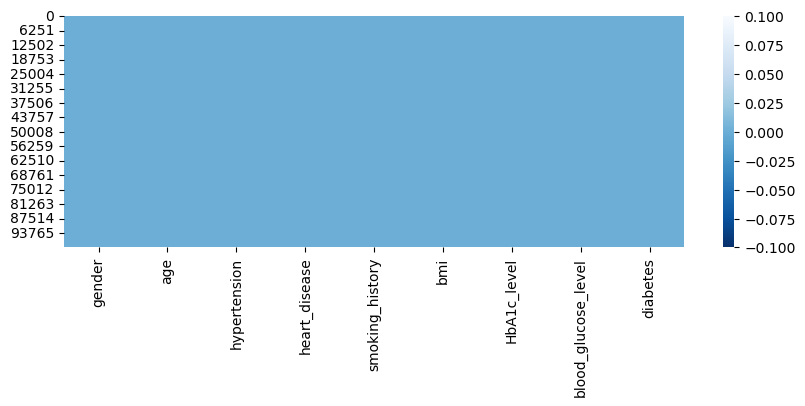

In [9]:
# visualising the missing data

plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar=True, cmap='Blues_r');

##### Since the entire heatmap is uniformly dark blue as seen above, it means there are no missing values in any of the columns for any record.

### Data Cleaning and Pre-Preprocessing

In [10]:
# check for duplicates

print(data.duplicated().sum())

3854


##### This means there are 3,854 completely duplicate rows (i.e., identical across all columns). I choose to work with the data that way because the kind of duplicate experience here is understandable

## EXPLORATORY DATA ANALYSIS

## Univariate Data Analysis 
This is necessary to understand the data, if there is a missing value and if there is outliers

In [11]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

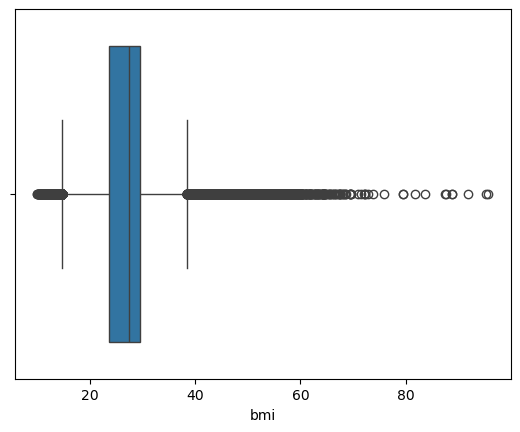

In [12]:
# Check out for outliers in bmi
sns.boxplot(x=data['bmi']);

##### The above diagram show the visualisation box plot of bmi column with outliers

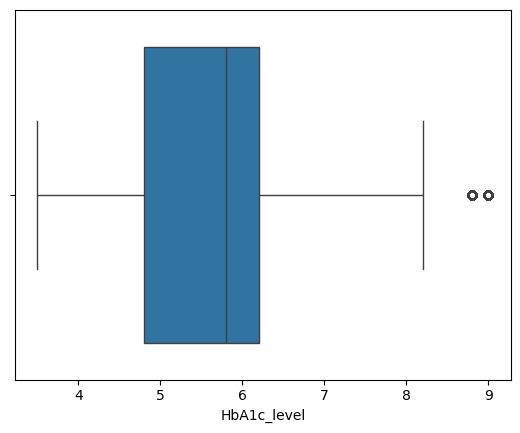

In [13]:
# check out for outliers in HbA1c_level

sns.boxplot(x=data['HbA1c_level']);

##### The above diagram show the visualisation box plot of HbA1c_level column with outliers

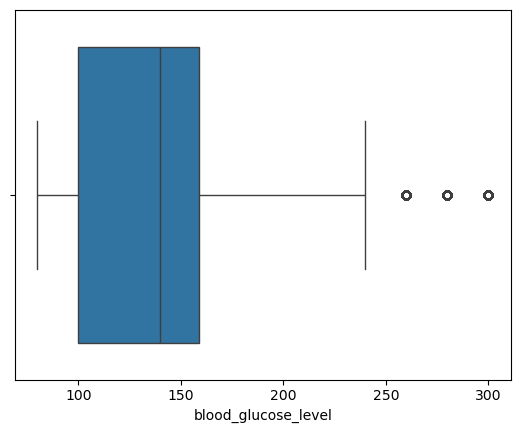

In [14]:
# check out for outliers in 'blood_glucose_level'

sns.boxplot(x=data['blood_glucose_level']);

##### The above diagram show the visualisation box plot of blood_glucose_level column with outliers

### Data visualisation of Numerical Features

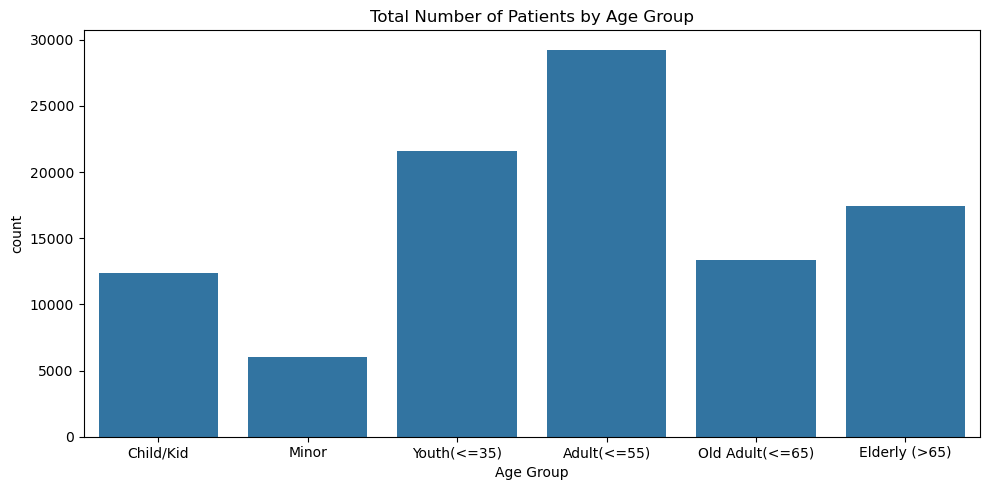

In [15]:
### Age categorisation

def age_category(age):
    if age <=12:
        return 'Child/Kid'
    elif age <= 18:
        return 'Minor'
    elif age <= 35:
        return 'Youth(<=35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old Adult(<=65)'
    else:
        return 'Elderly (>65)'
        
data['age_category'] = data['age'].apply(age_category)

# Define custom order for age categories
age_order = ['Child/Kid', 'Minor', 'Youth(<=35)', 'Adult(<=55)', 'Old Adult(<=65)', 'Elderly (>65)']


# Investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='age_category', data=data, order=age_order)
plt.xlabel('Age Group')
plt.title('Total Number of Patients by Age Group')
plt.tight_layout()
plt.show()

##### The bar chart shows the total number of patients in each defined age group, arranged from youngest to oldest. This makes it easier to interpret trends in age distribution and spot which demographic group is most represented in the clinic. The adult age category, which is between 36 and 55 years old, is the most affected category of patients with diabetes, followed by the youth category (age between 19 years old and 35 years old) and the elderly category in third place.

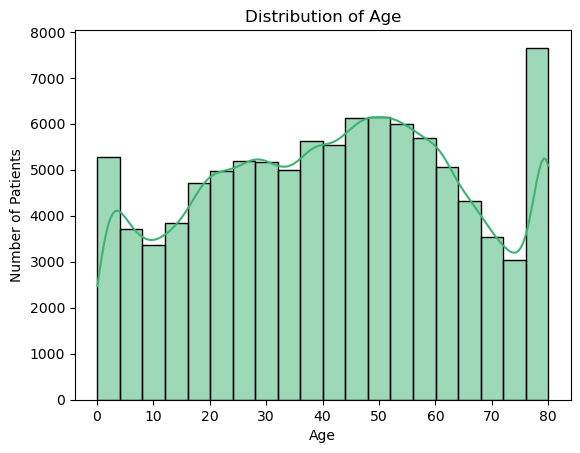

In [16]:
# Visualizing the distribution of Age in the clinic

plt.figure()
sns.histplot(data['age'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

##### As seen in the visialisation above, the age is right-skewed; there is concentration in middle-aged to older adults.

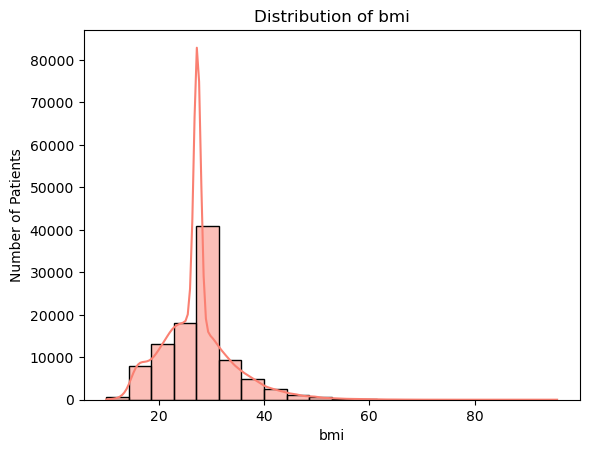

In [17]:
# Visualizing the distribution of bmi in the clinic

plt.figure()
sns.histplot(data['bmi'], bins=20, kde=True, color='salmon')
plt.title('Distribution of bmi')
plt.xlabel('bmi')
plt.ylabel('Number of Patients')
plt.show()

#### bmi appears to be normally distributed but slightly skewed right.

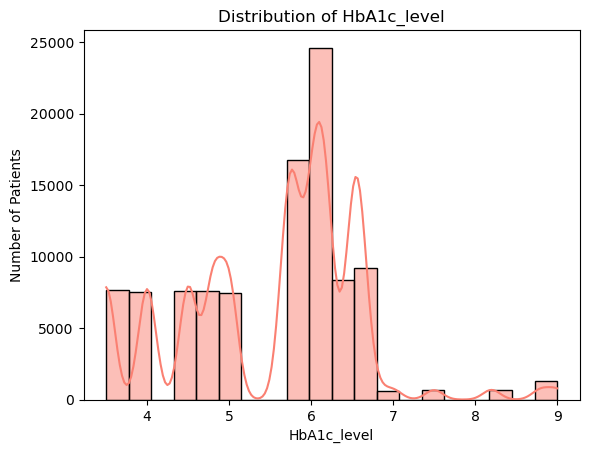

In [18]:
# Visualizing the distribution of HbA1c_level in the clinic

plt.figure()
sns.histplot(data['HbA1c_level'], bins=20, kde=True, color='salmon')
plt.title('Distribution of HbA1c_level')
plt.xlabel('HbA1c_level')
plt.ylabel('Number of Patients')
plt.show()

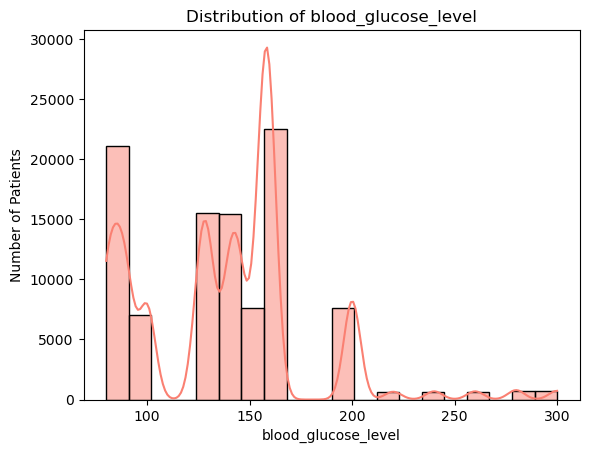

In [19]:
# Visualizing the distribution of Hblood_glucose_level in the clinic

plt.figure()
sns.histplot(data['blood_glucose_level'], bins=20, kde=True, color='salmon')
plt.title('Distribution of blood_glucose_level')
plt.xlabel('blood_glucose_level')
plt.ylabel('Number of Patients')
plt.show()

##### HbA1c_level and blood_glucose_level are both skewed; high glucose levels could indicate potential diabetes cases.

#### Data Visualisation for Categorical Features

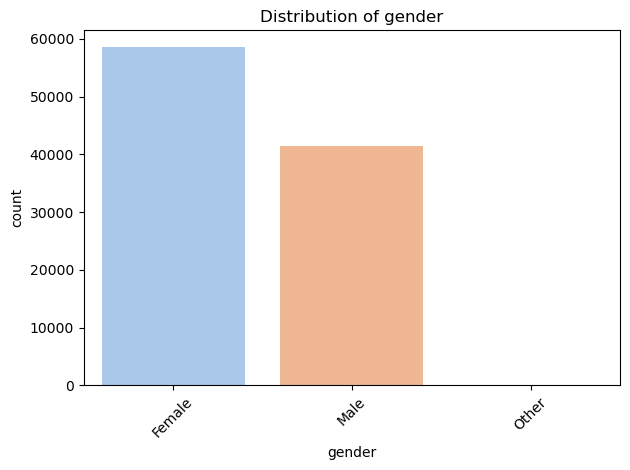

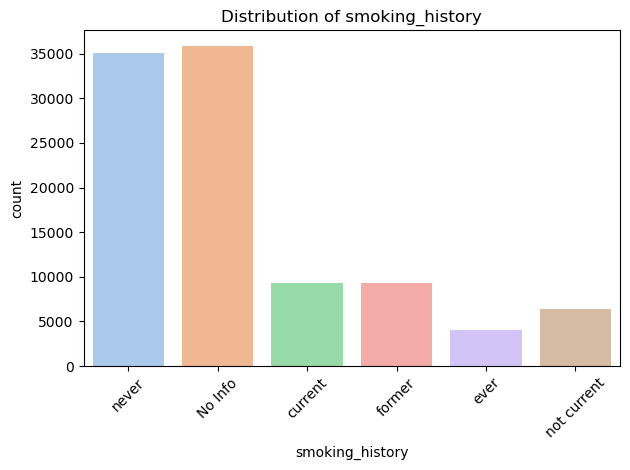

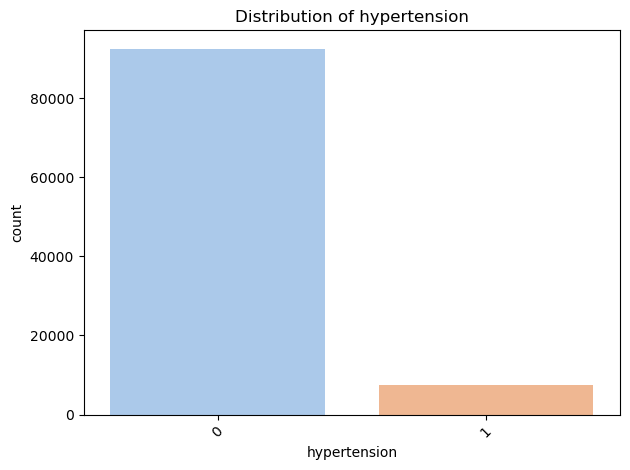

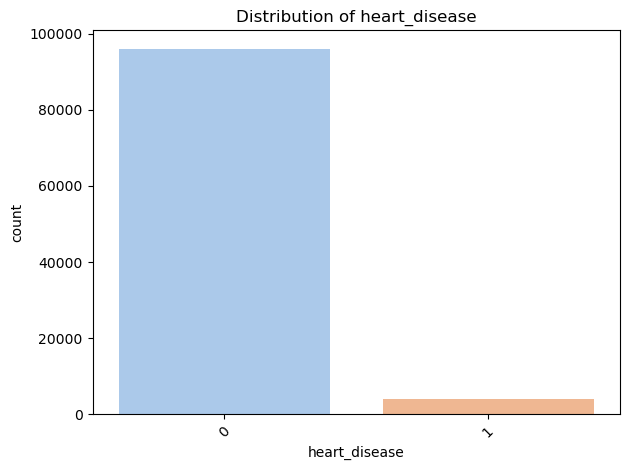

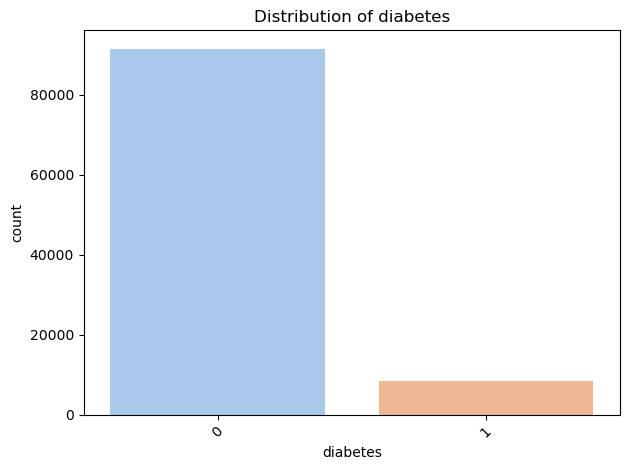

In [20]:
# Visualising the distribution of gender, smoking_history, hypertension, heart-disease, diabetes in the clinic

categorical_cols = ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=data, x=col, hue=col, palette="pastel", legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

label
no     91500
yes     8500
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

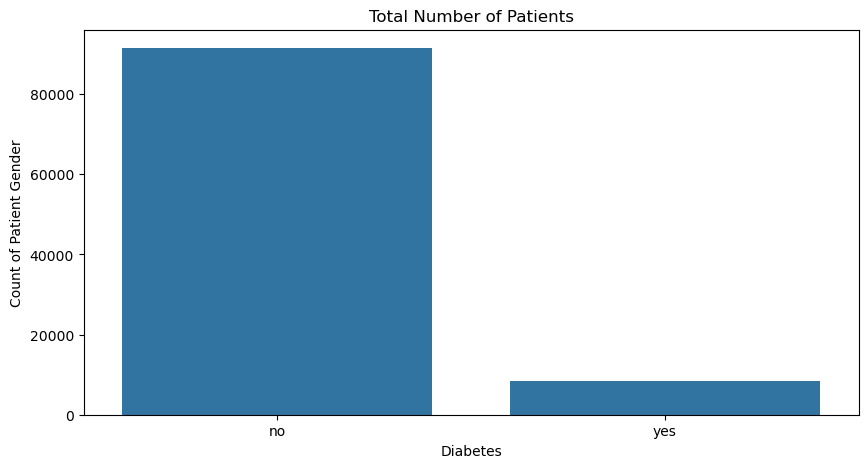

In [21]:
# Data visualisation
# Diabetes - have diabetes or not (1=yes, 0=n0)
def label (dbts):
    if dbts == 1:
        return 'yes'
    else:
        return 'no'

data['label'] = data['diabetes'].apply(label)

# Total Patient in each category
print(data['label'].value_counts())

# Investigating the gender of patients
plt.figure(figsize = (10,5))
sns.countplot(x='label', data=data)
plt.xlabel('Diabetes')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')

##### Distribution is fairly balanced, with a slight majority in the female group compared to the male. In smoking_history, "never" and "No Info" dominate the distribution. This implies a significant portion of patients either never smoked or did not provide smoking data. The distribution of hypertension shows that most individuals do not have hypertension. However, the presence of hypertensive patients is still considerable and relevant in the diabetic risk context. The majority of patients do not have heart disease. Only a small fraction has been diagnosed with heart disease, but it remains a significant risk factor. The dataset is imbalanced — significantly more non-diabetic individuals than diabetic ones. This class imbalance is important for model training, as it may bias predictions toward the majority class.¶

### Bivariate Data Analysis

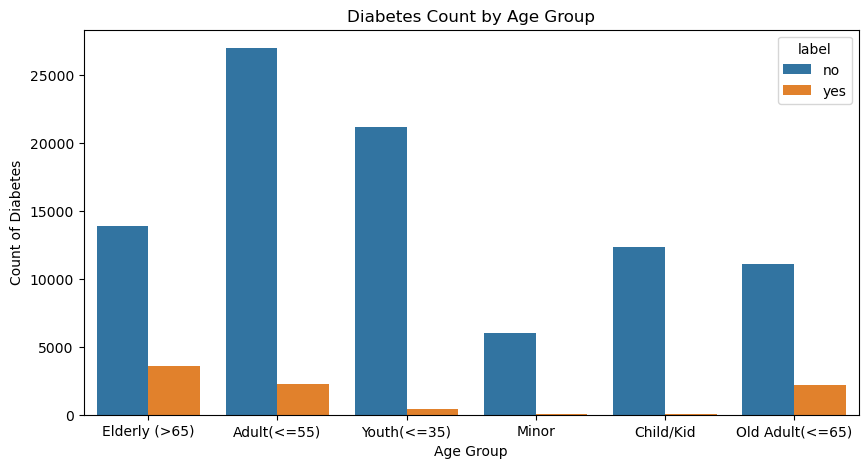

In [22]:
# Investigating the age category of the patients by the target feature (Diabetes)

plt.figure(figsize = (10,5))
sns.countplot(x='age_category', data=data, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Diabetes')
plt.title('Diabetes Count by Age Group');

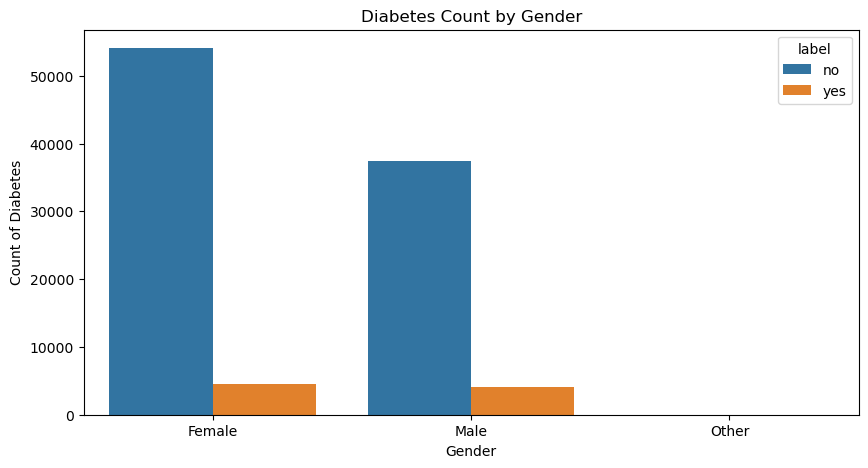

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(x='gender', data=data, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Diabetes')
plt.title('Diabetes Count by Gender');

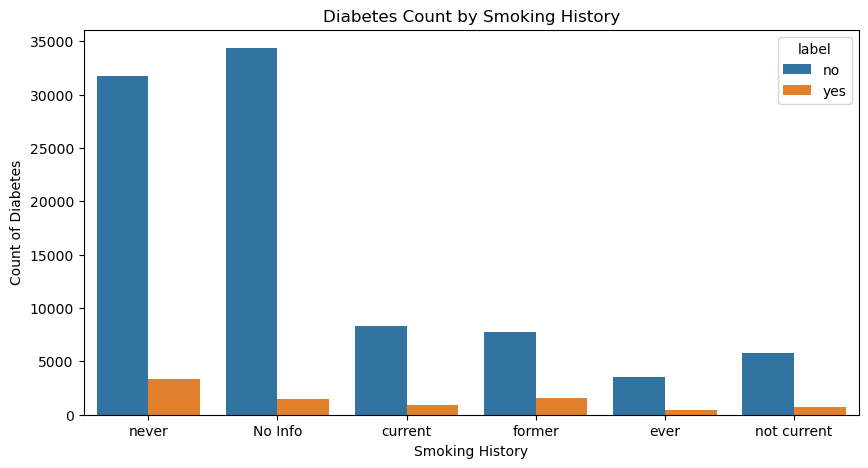

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(x='smoking_history', data=data, hue='label')
plt.xlabel('Smoking History')
plt.ylabel('Count of Diabetes')
plt.title('Diabetes Count by Smoking History');

#### Multivariate Analysis

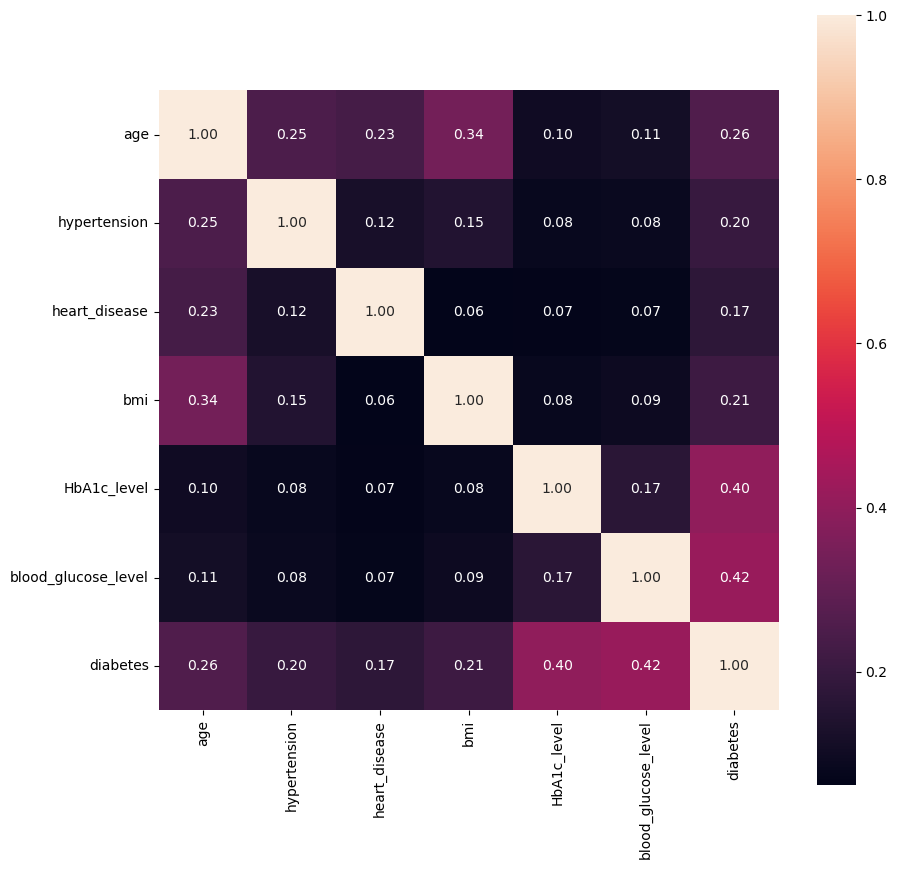

In [25]:
# Correlation between SalePrice and other variables in the dataset

plt.figure(figsize = (10, 10))
numeric_data = data.select_dtypes(include=['number'])           # select only numeric columns
hm = sns.heatmap(numeric_data.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

##### This heatmap shows pairwise correlations between all numeric variables in the dataset. Colour intensity indicates the strength of correlation. The values range from -1 (strong negative) to +1 (strong positive). The darker cells show stronger relationships.

##### The diagonal values are always 1.00, which means each variable is perfectly correlated with itself.

##### Looking at blood_glucose_level vs diabetes, 0.42 indicates a moderate positive correlation. Higher glucose levels are associated with diabetes. Looking at HbA1c level vs. diabetes, 0.40 is also a moderate correlation. Elevated HbA1c is a diagnostic marker for diabetes. Age, bmi vs diabetes	has a correlation between the range of 0.21–0.26. This indicates a Weak to moderate correlation, still relevant. Hypertension, heart disease vs diabetes	within the range of 0.17–0.20 shows positive correlation.

In [26]:
dataframe1 = data [['age',	'hypertension',	'heart_disease',	'bmi',	'HbA1c_level',	'blood_glucose_level']]

label = data[['diabetes']]

In [27]:
dataframe1.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155


In [28]:
label.head()

,diabetes
0,0
1,0
2,0
3,0
4,0


In [29]:
dataframe1.tail()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
99995,80.0,0,0,27.32,6.2,90
99996,2.0,0,0,17.37,6.5,100
99997,66.0,0,0,27.83,5.7,155
99998,24.0,0,0,35.42,4.0,100
99999,57.0,0,0,22.43,6.6,90


In [30]:
dataframe1.dtypes

age                    float64
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
dtype: object

In [31]:
# Dealing with outliers - 'bmi', 'HbA1c_level', 'blood_glucose_level'

# Normalize the data
scaler = MinMaxScaler()

dataframe1['Scaled_bmi'] = scaler.fit_transform(dataframe1['bmi'].values.reshape(-1,1))
dataframe1['Scaled_hbl'] = scaler.fit_transform(dataframe1['HbA1c_level'].values.reshape(-1,1))
dataframe1['Scaled_bgl'] = scaler.fit_transform(dataframe1['blood_glucose_level'].values.reshape(-1,1))


dataframe1.drop(['bmi', 'HbA1c_level', 'blood_glucose_level'], axis=1, inplace=True)

dataframe1.head()

,age,hypertension,heart_disease,Scaled_bmi,Scaled_hbl,Scaled_bgl
0,80.0,0,1,0.177171,0.563636,0.272727
1,54.0,0,0,0.202031,0.563636,0.000000
2,28.0,0,0,0.202031,0.400000,0.354545
3,36.0,0,0,0.156863,0.272727,0.340909
4,76.0,1,1,0.118231,0.236364,0.340909


### Machine Learning

In [32]:
# Split the dataset into training and testing sets   X = Is anything that has Questions, y = Is anything that has answer

X_train, X_test, y_train, y_test = train_test_split(dataframe1,label,test_size=0.2, random_state=42)                                               

#### Training 5 Different Supervised Model Building

In [33]:
#1 Logistic Regression model
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)


# Evaluate the model
print ('Logistic Regression')
print ('Accuracy:', accuracy_score(y_test,ly_pred))
print ('Precision:', precision_score(y_test,ly_pred))
print ('Recall:', recall_score(y_test,ly_pred))
print ('F1-score:', f1_score(y_test,ly_pred))
print ('AUC-ROC:', roc_auc_score(y_test,ly_pred))

Logistic Regression
Accuracy: 0.95845
Precision: 0.8783433994823123
Recall: 0.5960187353629977
F1-score: 0.7101499825601674
AUC-ROC: 0.7941552237934602


##### The Logistic Regression model was trained to classify individuals as diabetic or not based on features like age, gender, BMI, glucose level, and medical history. The evaluation shows that the model is highly accurate (96%) and very precise in its predictions (87%), meaning it rarely falsely identifies non-diabetics as diabetic. However, the recall of 59% reveals that it misses about a third of actual diabetic cases, which may be a concern in healthcare settings where missing a diagnosis can be critical. The F1-score of 71% and AUC-ROC of 0.79 confirm that the model performs well overall and can effectively differentiate between the two classes. For improved recall, further tuning or more complex models like Random Forest may be considered.

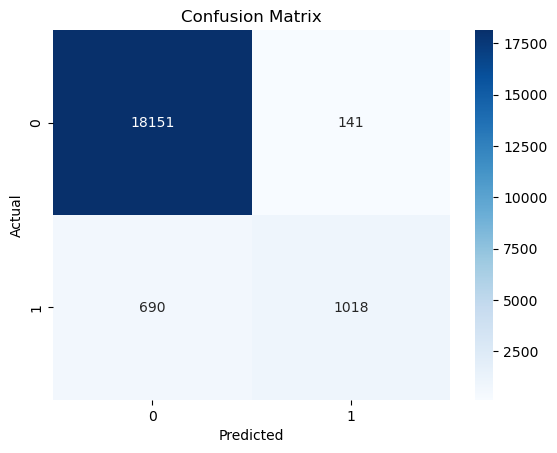

In [34]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualise the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### The confusion matrix from the Logistic Regression model shows strong performance in correctly identifying individuals without diabetes, with 18,151 true negatives and only 141 false positives. This means the model is highly reliable at ruling out non-diabetic cases. However, among individuals who actually have diabetes, the model correctly identifies 1,018 but misses 690 cases, resulting in a trade-off in recall. These missed cases are important in a healthcare context, as failing to identify a diabetic patient could delay necessary treatment. Overall, the model demonstrates high specificity but moderate sensitivity, which suggests it is conservative in predicting diabetes and may benefit from adjustment if the goal is to catch more true diabetic cases.

In [35]:
#2 Random Forest Classifier

rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

# Evaluating the model
print ('Random Forest Classifier')
print ('Accuracy:', accuracy_score(y_test,rfy_pred))
print ('Precision:', precision_score(y_test,rfy_pred))
print ('Recall:', recall_score(y_test,rfy_pred))
print ('F1-score:', f1_score(y_test,rfy_pred))
print ('AUC-ROC:', roc_auc_score(y_test,rfy_pred))

Random Forest Classifier
Accuracy: 0.9685
Precision: 0.9095744680851063
Recall: 0.7008196721311475
F1-score: 0.7916666666666666
AUC-ROC: 0.8471570479614845


##### The Random Forest Classifier shows outstanding performance in classifying diabetes risk. With an accuracy of 97.0%, it makes correct predictions for the vast majority of patients. Its high precision (92%) indicates very few false alarms that most predictions of diabetes are accurate. More importantly, it captures 70% of all actual diabetic cases, a significant improvement over logistic regression. This better balance of sensitivity (recall) and specificity is also reflected in its F1-score of nearly 80%, and its AUC-ROC score of 0.84 confirms strong overall discriminatory power. This makes Random Forest a highly reliable model for diabetes prediction in this dataset, especially when both accuracy and disease detection are critical.

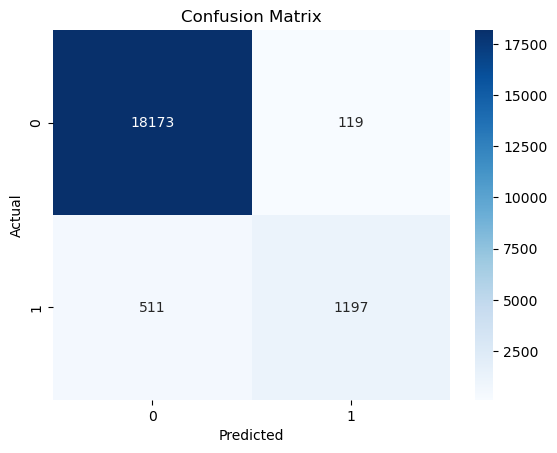

In [36]:
# Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualise the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
#3 KNeighbors Classifier

knc= KNeighborsClassifier()
knc.fit(X_train, y_train)
kny_pred = knc.predict(X_test)

# Evaluating the model
print ('KNeighbors Classifier')
print ('Accuracy:', accuracy_score(y_test,kny_pred))
print ('Precision:', precision_score(y_test,kny_pred))
print ('Recall:', recall_score(y_test,kny_pred))
print ('F1-score:', f1_score(y_test,kny_pred))
print ('AUC-ROC:', roc_auc_score(y_test,kny_pred))

KNeighbors Classifier
Accuracy: 0.95775
Precision: 0.8869955156950673
Recall: 0.5790398126463701
F1-score: 0.7006730428622033
AUC-ROC: 0.7860757777423847


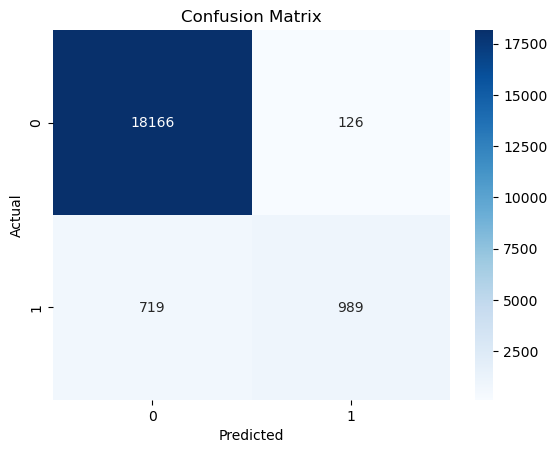

In [38]:
# Create a confusion matrix
kcm = confusion_matrix(y_test, kny_pred)

# Visualise the confusion matrix
sns.heatmap(kcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
#4 XGB Classifier

xgbc= XGBClassifier()
xgbc.fit(X_train, y_train)
xgby_pred = xgbc.predict(X_test)

# Evaluating the model
print ('XGBClassifier')
print ('Accuracy:', accuracy_score(y_test,xgby_pred))
print ('Precision:', precision_score(y_test,xgby_pred))
print ('Recall:', recall_score(y_test,xgby_pred))
print ('F1-score:', f1_score(y_test,xgby_pred))
print ('AUC-ROC:', roc_auc_score(y_test,xgby_pred))

XGBClassifier
Accuracy: 0.9712
Precision: 0.9528
Recall: 0.6973067915690867
F1-score: 0.8052738336713996
AUC-ROC: 0.8470406689094067


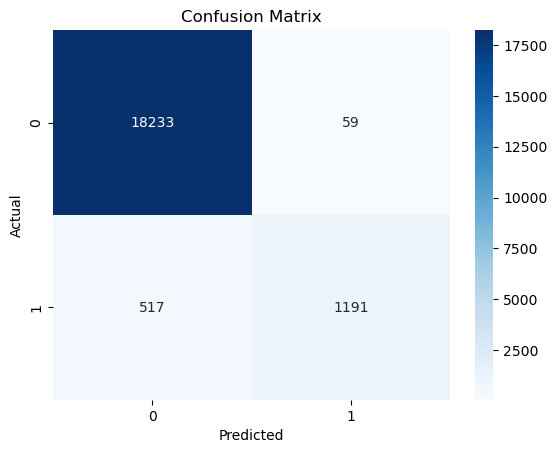

In [40]:
# Create a confusion matrix
xgbcm = confusion_matrix(y_test, xgby_pred)

# Visualise the confusion matrix
sns.heatmap(xgbcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
#5 SGD Classifier

sgdc= SGDClassifier()
sgdc.fit(X_train, y_train)
sgdy_pred = sgdc.predict(X_test)

# Evaluating the model
print ('SGDClassifier')
print ('Accuracy:', accuracy_score(y_test,sgdy_pred))
print ('Precision:', precision_score(y_test,sgdy_pred))
print ('Recall:', recall_score(y_test,sgdy_pred))
print ('F1-score:', f1_score(y_test,sgdy_pred))
print ('AUC-ROC:', roc_auc_score(y_test,sgdy_pred))

SGDClassifier
Accuracy: 0.95405
Precision: 0.7760671798460462
Recall: 0.6492974238875878
F1-score: 0.7070449474019764
AUC-ROC: 0.8159017187227138


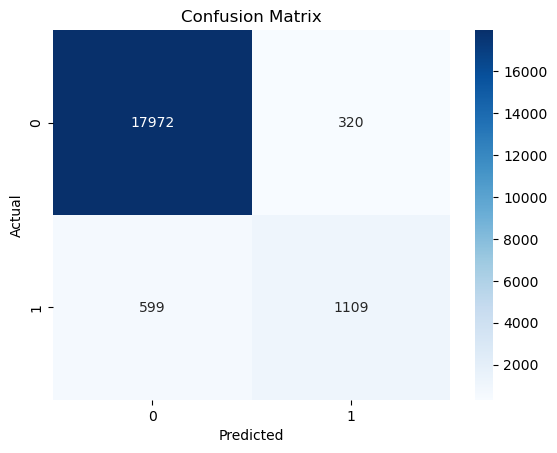

In [42]:
# Create a confusion matrix
sgdcm = confusion_matrix(y_test, sgdy_pred)

# Visualise the confusion matrix
sns.heatmap(sgdcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Key insight from Models Evaluation 

##### XGBClassifier offers the best trade-off between precision and recall, with the highest AUC. For medical problems like diabetes prediction, false negatives (missed diabetics) are more critical than false positives. It's better to err on the side of caution and flag a non-diabetic than miss a diabetic. So recall on class 1 (diabetes = 1) is the priority metric.

#### SAVING THE MODELS

In [55]:
from joblib import dump

# Here, I assume I have a trained model called model

model = XGBClassifier().fit(X_train, y_train)

In [56]:
dump(model, 'diabetes.joblib')

['diabetes.joblib']

#### The best model (XGBClassifier) has been saved successfully.